## Import packages

In [1]:
install.packages("arules")
library(arules)

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
install.packages("dummies")
library(dummies)

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
dummies-1.5.6 provided by Decision Patterns



In [3]:
install.packages("dplyr")

Installing package into ‘/home/martinho/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [4]:
discretize_all = function(table_d, type, n){
    for (i in 1:ncol(table_d)) {
        if (is.numeric(table_d[[i]])) {
            table_d[[i]]  =  discretize(table_d[[i]],  method  =  type,  categories  =  n, ordered=TRUE)
        }
    }
    print(summary(table_d))
    return(table_d);
}

#### Change directory

In [5]:
setwd("~/Documents/IST/SAD/project")

## 1. - crabs.csv
### a.

In [6]:
library(readr)
crabs <-read_csv("data/crabs.csv")
crabs$sp <- NULL
crabs$index <- NULL
class(crabs)

Parsed with column specification:
cols(
  sp = col_character(),
  sex = col_character(),
  index = col_integer(),
  FL = col_double(),
  RW = col_double(),
  CL = col_double(),
  CW = col_double(),
  BD = col_double()
)


[1] "tbl_df"     "tbl"        "data.frame"

In [7]:
library(dplyr)
crabs = mutate_if(crabs, is.character, as.factor)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [8]:
head(crabs,n=2)

sex,FL,RW,CL,CW,BD
M,8.1,6.7,16.1,19.0,7.0
M,8.8,7.7,18.1,20.8,7.4


In [9]:
is <- apriori(crabs_int_2, parameter = list(support = 0.5, target="rules"))
is_o_2 <- as(is,"data.frame")
head(is_o_2,n=4)

ERROR: Error in .class1(object): object 'crabs_int_2' not found


In [37]:
crabs_int_2 = discretize_all(crabs, "interval",2)
min_sup = 87/200
min_x_2 = min_sup
i=0 

sup_2 <- vector()
rules_2 <- vector()
confidence_2 <- vector()
while (min_sup <= 1){
    sup_2[i] <- min_sup
    i=i+1
    min_sup = min_sup + 0.001
}
i=1
for (value in sup_2){
    is <- apriori(crabs_int_2, parameter = list(support = value, target="rules"))
    is_o <- as(is,"data.frame")
    rules_2[i]<-length(is)
    #ruledf = data.frame(lhs = labels(lhs(is_o))$elements,rhs = labels(rhs(is_o))$elements, is_o@quality)
    total_con=0
    if (is.na(mean(is_o[["confidence"]]))){
        confidence_2[i] <- 0
    } else {
        confidence_2[i] <- mean(is_o[["confidence"]])
        
    }
    i=i+1
}

 sex               FL                RW                CL     
 F:100   [ 7.2,15.2): 93   [ 6.5,13.3):113   [14.7,31.2): 86  
 M:100   [15.2,23.1]:107   [13.3,20.2]: 87   [31.2,47.6]:114  
           CW                BD     
 [17.1,35.9): 93   [ 6.1,13.9): 98  
 [35.9,54.6]:107   [13.9,21.6]:102  
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.436      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [33 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.437      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [33 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.438      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [33 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.439      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [33 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.44      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [33 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.441      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.442      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.443      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.444      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.445      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.446      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.447      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.448      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.449      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.45      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.451      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.452      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.453      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.454      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.455      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.456      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.457      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.458      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.459      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.46      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.461      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.462      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.463      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.464      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.465      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 93 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_2, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.466      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 93 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [21 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.467      1
 maxlen target  

Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.537      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.538      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.539      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.54      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.541      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.542      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.543      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.544      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.545      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.546      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.547      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.548      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.549      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.55      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.551      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.552      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.553      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.554      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.555      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.556      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.557      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.558      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.559      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.56      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.561      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.562      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.563      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.564      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.565      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.566      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.567      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.568      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.569      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.57      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.571      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.572      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.573      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.574      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.575      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.576      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.577      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.578      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.579      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.58      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.581      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.582      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.583      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.584      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.585      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.586      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.587      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.588      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.589      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.59      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.591      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.592      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.593      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.594      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.595      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.596      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.597      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.598      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.599      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.6      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.601      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.602      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.603      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.604      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.605      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.606      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.607      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.608      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.609      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.61      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.611      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.612      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.613      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.614      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.615      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.616      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.617      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.618      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.619      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.62      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.621      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.622      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.623      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.624      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.625      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.626      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.627      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.628      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.629      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.63      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.631      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.632      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.633      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.634      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.635      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.636      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.637      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.638      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.639      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.64      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.641      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.642      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.643      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.644      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.645      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.646      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.647      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.648      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.649      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.65      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.651      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.652      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.653      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.654      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.655      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.656      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.657      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.658      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.659      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.66      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.661      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.662      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.663      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.664      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.665      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.666      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.667      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.668      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.669      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.67      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.671      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.672      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.673      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.674      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.675      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.676      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.677      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.678      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.679      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.68      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.681      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.682      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.683      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.684      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.685      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.686      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.687      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.688      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.689      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.69      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.691      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.692      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.693      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.694      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.695      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.696      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.697      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.698      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.699      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.7      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.701      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.702      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.703      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.704      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.705      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.706      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.707      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.708      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.709      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.71      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.711      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.712      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.713      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.714      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.715      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.716      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.717      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.718      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.719      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.72      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.721      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.722      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.723      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.724      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.725      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.726      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.727      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.728      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.729      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.73      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.731      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.732      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.733      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.734      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.735      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.736      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.737      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.738      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.739      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.74      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.741      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.742      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.743      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.744      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.745      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.746      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.747      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.748      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.749      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.75      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.751      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.752      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.753      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.754      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.755      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.756      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.757      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.758      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.759      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.76      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.761      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.762      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.763      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.764      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.765      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.766      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.767      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.768      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.769      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.77      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.771      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.772      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.773      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.774      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.775      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.776      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.777      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.778      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.779      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.78      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.781      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.782      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.783      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.784      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.785      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.786      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.787      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.788      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.789      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.79      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.791      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.792      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.793      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.794      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.795      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.796      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.797      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.798      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.799      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.8      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.801      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.802      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.803      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.804      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.805      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.806      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.807      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.808      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.809      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.81      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.811      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.812      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.813      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.814      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.815      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.816      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.817      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.818      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.819      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.82      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.821      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.822      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.823      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.824      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.825      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.826      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.827      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.828      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.829      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.83      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.831      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.832      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.833      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.834      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.835      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.836      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.837      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.838      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.839      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.84      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.841      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.842      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.843      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.844      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.845      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.846      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.847      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.848      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.849      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.85      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.851      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.852      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.853      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.854      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.855      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.856      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.857      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.858      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.859      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.86      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.861      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.862      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.863      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.864      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.865      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.866      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.867      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.868      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.869      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.87      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.871      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.872      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.873      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.874      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.875      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.876      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.877      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.878      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.879      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.88      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.881      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.882      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.883      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.884      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.885      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.886      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.887      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.888      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.889      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.89      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.891      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.892      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.893      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.894      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.895      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.896      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.897      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.898      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.899      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.9      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.901      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.902      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.903      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.904      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.905      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.906      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.907      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.908      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.909      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.91      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.911      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.912      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.913      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.914      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.915      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.916      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.917      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.918      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.919      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.92      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.921      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.922      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.923      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.924      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.925      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.926      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.927      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.928      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.929      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.93      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.931      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.932      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.933      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.934      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.935      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.936      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.937      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.938      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.939      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.94      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.941      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.942      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.943      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.944      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.945      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.946      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.947      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.948      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.949      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.95      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.951      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.952      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.953      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.954      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.955      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.956      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.957      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.958      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.959      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.96      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.961      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.962      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.963      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.964      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.965      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.966      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.967      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.968      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.969      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.97      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.971      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.972      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.973      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.974      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.975      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.976      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.977      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.978      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.979      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.98      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.981      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.982      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.983      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.984      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.985      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.986      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.987      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.988      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.989      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.99      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.991      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.992      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.993      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.994      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.995      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.996      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.997      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.998      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.999      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

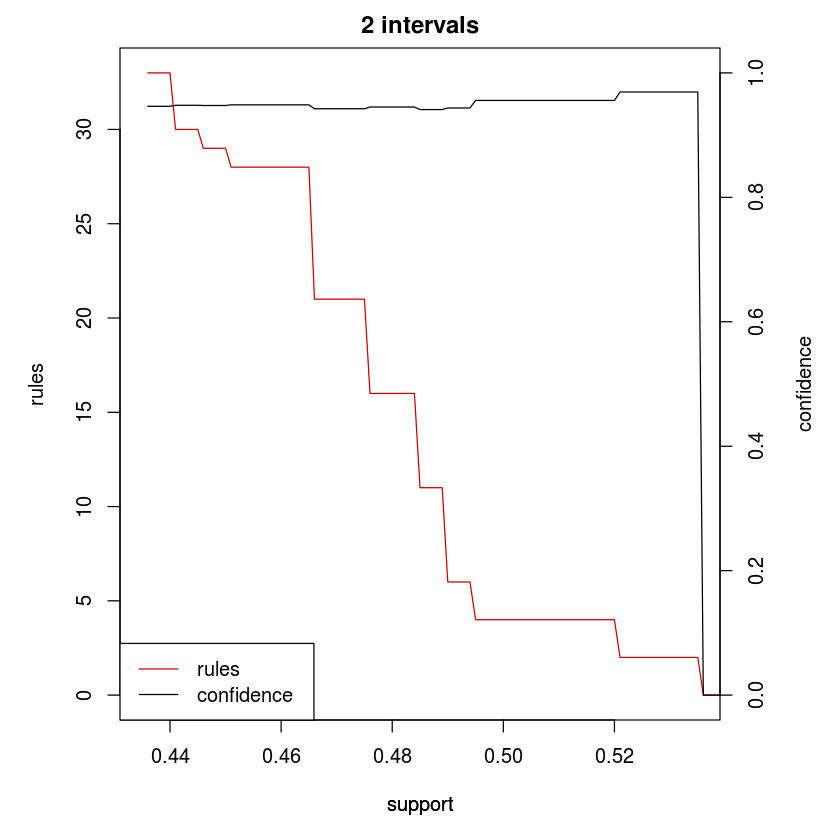

In [40]:
d = data.frame(sup_2,
           rules_2,
           confidence_2, 2)
par(mar = c(5,5,2,5))
with(d
     , plot(sup_2, rules_2, type="l",main="2 intervals", col="red3", xlab="support",
             ylab="rules",xlim=c(min_x_2,0.535)))
par(new = T)
with(d, plot(sup_2, confidence_2, axes=F, xlab="support",ylab=NA, type="l",xlim=c(min_x_2,0.535),ylim=c(0,1)))
axis(side = 4)
mtext(side = 4, line = 3, 'confidence')
legend("bottomleft",
       legend=c("rules", "confidence"),
       lty=c(1,1), col=c("red3", "black"))

In [ ]:
is <- apriori(crabs_int_3, parameter = list(support = 0.5, target="rules"))
is_o_3 <- as(is,"data.frame")
head(is_o_3,n=2)

In [41]:
crabs_int_3 = discretize_all(crabs, "interval",3)
min_sup = 31/200
min_x_3 = min_sup
i=0 
sup_3 <- vector()
rules_3 <- vector()
confidence_3 <- vector()
while (min_sup <= 1){
    sup_3[i] <- min_sup
    i=i+1
    min_sup = min_sup + 0.001
}
i=1
for (value in sup_3){
    is <- apriori(crabs_int_3, parameter = list(support = value, target="rules"))
    rules_3[i]<-length(is)
    is_o <- as(is,"data.frame")
    
    #ruledf = data.frame(lhs = labels(lhs(is_o))$elements,rhs = labels(rhs(is_o))$elements, is_o@quality)
    total_con=0
    if (is.na(mean(is_o[["confidence"]]))){
        confidence_3[i] <- 0
    } else {
        confidence_3[i] <- mean(is_o[["confidence"]])
        
    }
    i=i+1
}


 sex               FL                RW                CL     
 F:100   [ 7.2,12.5): 37   [ 6.5,11.1): 53   [14.7,25.7): 38  
 M:100   [12.5,17.8):106   [11.1,15.6):116   [25.7,36.6):106  
         [17.8,23.1]: 57   [15.6,20.2]: 31   [36.6,47.6]: 56  
           CW                BD     
 [17.1,29.6): 40   [ 6.1,11.3): 46  
 [29.6,42.1):111   [11.3,16.4):102  
 [42.1,54.6]: 49   [16.4,21.6]: 52  
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.156      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 31 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking su

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.256      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 51 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.257      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 51 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.258      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 51 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.259      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 51 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.26      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 52 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.261      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 52 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.262      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 52 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.263      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 52 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.264      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 52 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.265      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 53 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.266      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 53 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.267      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 53 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.268      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 53 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.269      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 53 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.27      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 54 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.271      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 54 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.272      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 54 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.273      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 54 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.274      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 54 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.275      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 55 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.276      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 55 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.277      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 55 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.278      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 55 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.279      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 55 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.28      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 56 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.281      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 56 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.282      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 56 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.283      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 56 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.284      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 56 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.285      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 57 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.286      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 57 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.287      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 57 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.288      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 57 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.289      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 57 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.29      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 58 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.291      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 58 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.292      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 58 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.293      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 58 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.294      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 58 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.295      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.296      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.297      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.298      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.299      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.301      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.302      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.303      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.304      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.305      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 61 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.306      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 61 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.307      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 61 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.308      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 61 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.309      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 61 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.31      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 62 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.311      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 62 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.312      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 62 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.313      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 62 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.314      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 62 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.315      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 63 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.316      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 63 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.317      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 63 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.318      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 63 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.319      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 63 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.32      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 64 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.321      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 64 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.322      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 64 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.323      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 64 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.324      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 64 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.325      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 65 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.326      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 65 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.327      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 65 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.328      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 65 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.329      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 65 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.33      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 66 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.331      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 66 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.332      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 66 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.333      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 66 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.334      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 66 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.335      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 67 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.336      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 67 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.337      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 67 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.338      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 67 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.339      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 67 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.34      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 68 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.341      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 68 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.342      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 68 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.343      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 68 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.344      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 68 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.345      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 69 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.346      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 69 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.347      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 69 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.348      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 69 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.349      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 69 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.35      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.351      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.352      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.353      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.354      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.355      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 71 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.356      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 71 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.357      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 71 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.358      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 71 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.359      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 71 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.36      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.361      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.362      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.363      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.364      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.365      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.366      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.367      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.368      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.01s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.369      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.37      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [63 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.371      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [63 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.372      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [63 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.373      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [63 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.374      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”

 done [0.00s].
writing ... [63 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.375      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 75 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [55 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.376      1
 maxlen target

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.416      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.417      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.418      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.419      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.42      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.421      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.422      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.423      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.424      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.425      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.426      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.427      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.428      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.429      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.43      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.431      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.432      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.433      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.00s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.434      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(crabs_int_3, parameter = list(support = value, target = "rules")):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0.01s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.435      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [22 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.436      1
 maxlen target  

Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.521      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.522      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.523      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.524      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.525      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.526      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.527      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.528      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.529      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.53      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.531      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.532      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.533      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.534      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.535      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.536      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.537      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.538      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.539      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.54      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.541      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.542      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.543      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.544      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.545      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.546      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.547      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.548      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.549      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.55      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.551      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.552      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.553      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.554      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.555      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.556      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.557      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.558      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.559      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.56      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.561      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.562      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.563      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.564      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.565      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.566      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.567      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.568      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.569      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.57      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.571      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.572      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.573      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.574      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.575      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.576      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.577      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.578      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.579      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.58      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.581      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.582      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.583      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.584      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.585      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.586      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.587      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.588      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.589      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.59      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.591      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.592      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.593      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.594      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.595      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.596      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.597      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.598      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.599      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.6      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.601      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.602      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.603      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.604      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.605      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.606      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.607      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.608      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.609      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.61      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.611      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.612      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.613      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.614      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.615      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.616      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.617      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.618      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.619      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.62      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.621      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.622      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.623      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.624      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.625      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.626      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.627      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.628      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.629      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.63      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.631      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.632      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.633      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.634      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.635      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.636      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.637      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.638      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.639      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.64      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.641      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.642      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.643      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.644      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.645      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.646      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.647      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.648      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.649      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.65      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.651      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.652      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.653      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.654      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.655      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.656      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.657      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.658      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.659      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.66      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.661      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.662      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.663      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.664      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.665      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.666      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.667      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.668      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.669      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.67      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.671      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.672      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.673      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.674      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.675      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.676      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.677      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.678      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.679      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.68      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.681      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.682      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.683      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.684      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.685      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.686      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.687      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.688      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.689      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.69      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.691      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.692      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.693      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.694      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.695      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.696      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.697      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.698      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.699      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.7      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.701      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.702      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.703      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.704      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.705      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.706      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.707      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.708      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.709      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.71      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.711      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.712      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.713      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.714      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.715      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.716      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.717      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.718      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.719      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.72      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.721      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.722      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.723      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.724      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.725      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.726      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.727      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.728      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.729      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.73      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.731      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.732      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.733      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.734      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.735      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.736      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.737      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.738      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.739      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.74      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.741      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.742      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.743      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.744      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.745      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.746      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.747      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.748      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.749      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.75      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.751      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.752      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.753      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.754      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.755      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.756      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.757      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.758      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.759      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.76      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.761      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.762      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.763      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.764      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.765      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.766      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.767      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.768      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.769      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.77      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.771      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.772      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.773      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.774      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.775      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.776      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.777      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.778      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.779      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.78      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.781      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.782      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.783      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.784      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.785      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.786      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.787      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.788      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.789      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.79      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.791      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.792      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.793      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.794      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.795      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.796      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.797      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.798      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.799      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.8      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.801      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.802      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.803      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.804      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.805      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.806      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.807      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.808      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.809      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.81      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.811      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.812      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.813      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.814      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.815      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.816      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.817      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.818      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.819      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.82      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.821      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.822      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.823      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.824      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.825      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.826      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.827      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.828      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.829      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.83      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.831      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.832      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.833      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.834      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.835      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.836      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.837      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.838      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.839      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.84      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.841      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.842      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.843      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.844      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.845      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.846      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.847      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.848      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.849      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.85      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.851      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.852      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.853      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.854      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.855      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.856      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.857      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.858      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.859      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.86      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.861      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.862      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.863      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.864      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.865      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.866      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.867      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.868      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.869      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.87      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.871      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.872      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.873      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.874      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.875      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.876      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.877      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.878      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.879      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.88      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.881      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.882      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.883      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.884      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.885      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.886      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.887      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.888      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.889      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.89      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.891      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.892      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.893      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.894      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.895      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.896      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.897      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.898      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.899      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.9      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.901      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.902      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.903      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.904      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.905      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.906      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.907      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.908      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.909      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.91      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.911      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.912      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.913      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.914      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.915      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.916      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.917      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.918      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.919      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.92      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.921      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.922      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.923      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.924      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.925      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.926      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.927      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.928      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.929      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.93      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.931      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.932      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.933      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.934      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.935      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.936      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.937      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.938      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.939      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.94      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.941      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.942      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.943      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.944      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.945      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.946      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.947      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.948      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.949      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.95      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.951      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.952      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.953      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.954      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.955      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.956      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.957      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.958      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.959      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.96      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.961      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.962      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.963      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.964      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.965      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.966      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.967      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.968      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.969      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.97      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.971      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.972      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.973      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.974      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.975      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.976      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.977      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.978      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.979      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.98      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.981      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.982      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.983      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.984      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.985      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.986      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.987      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.988      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.989      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.99      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.991      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.992      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.993      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.994      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.995      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.996      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.997      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.998      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.999      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

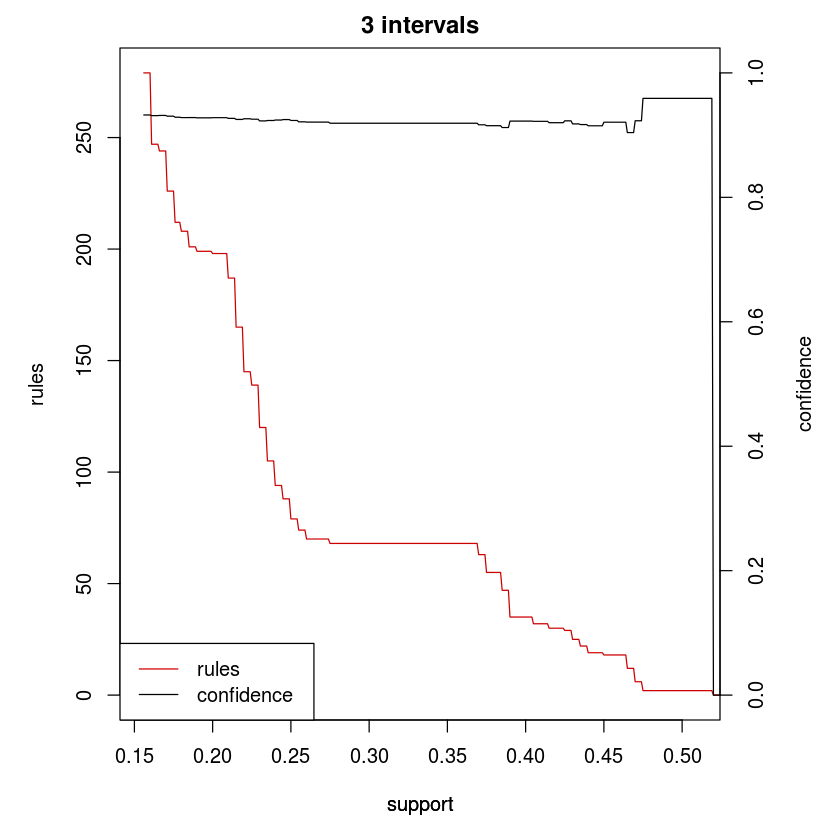

In [43]:
d = data.frame(sup_3,
           rules_3,
           confidence_3, 2)
par(mar = c(5,5,2,5))
with(d
     , plot(sup_3, rules_3, type="l",main="3 intervals", col="red3", xlab="support",
             ylab="rules",xlim=c(min_x_3,0.51)))
par(new = T)
with(d, plot(sup_3, confidence_3, axes=F, xlab="support",ylab=NA, type="l",xlim=c(min_x_3,0.51),ylim=c(0,1)))
axis(side = 4)
mtext(side = 4, line = 3, 'confidence')
legend("bottomleft",
       legend=c("rules", "confidence"),
       lty=c(1,1), col=c("red3", "black"))

In [44]:
crabs_int_4 = discretize_all(crabs, "interval",4)
min_sup = 12/200
min_x_4 = min_sup
i=0 
sup_4 <- vector()
rules_4 <- vector()
confidence_4 <- vector()
while (min_sup <= 1){
    sup_4[i] <- min_sup
    i=i+1
    min_sup = min_sup + 0.001
}
i=1
for (value in sup_4){
    is <- apriori(crabs_int_4, parameter = list(support = value, target="rules"))
    rules_4[i]<-length(is)
    is_o <- as(is,"data.frame")
    
    #ruledf = data.frame(lhs = labels(lhs(is_o))$elements,rhs = labels(rhs(is_o))$elements, is_o@quality)
    total_con=0
    if (is.na(mean(is_o[["confidence"]]))){
        confidence_4[i] <- 0
    } else {
        confidence_4[i] <- mean(is_o[["confidence"]])
        
    }
    i=i+1
}

 sex               FL                 RW               CL               CW    
 F:100   [ 7.2,11.2):22   [ 6.50, 9.93):28   [14.7,22.9):23   [17.1,26.5):23  
 M:100   [11.2,15.2):71   [ 9.93,13.35):85   [22.9,31.2):63   [26.5,35.9):70  
         [15.2,19.1):73   [13.35,16.77):75   [31.2,39.4):79   [35.9,45.2):81  
         [19.1,23.1]:34   [16.77,20.20]:12   [39.4,47.6]:35   [45.2,54.6]:26  
             BD    
 [ 6.10, 9.97):25  
 [ 9.97,13.85):73  
 [13.85,17.73):69  
 [17.73,21.60]:33  
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.061      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recodi

Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.361      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.362      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.363      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.364      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.365      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.366      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.367      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.368      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.369      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 73 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.37      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.371      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.372      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.373      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.374      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.375      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 75 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.376      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 75 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.377      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 75 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.378      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 75 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.379      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 75 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.38      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 76 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.381      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 76 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.382      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 76 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.383      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 76 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.384      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 76 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.385      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 77 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.386      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 77 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.387      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 77 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.388      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 77 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.389      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 77 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.39      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 78 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.391      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 78 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.392      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 78 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.393      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 78 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.394      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 78 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.395      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 79 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.396      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 79 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.397      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 79 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.398      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 79 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.399      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 79 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.4      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 80 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.401      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 80 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.402      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 80 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.403      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 80 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.404      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 80 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.405      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 81 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.406      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 81 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.407      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 81 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.408      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 81 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.409      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 81 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.41      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 82 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.411      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 82 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.412      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 82 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.413      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 82 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.414      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 82 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.415      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.416      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.417      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.418      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.419      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 83 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.42      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.421      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.422      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.423      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.424      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 84 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.425      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.426      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.427      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.428      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.429      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 85 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.43      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.431      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.432      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.433      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.434      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 86 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.435      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.436      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.437      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.438      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.439      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.44      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.441      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.442      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.443      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.444      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.445      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.446      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.447      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.448      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.449      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 89 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.45      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.451      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.452      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.453      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.454      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.455      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.456      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.457      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.458      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.459      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 91 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.46      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.461      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.462      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.463      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.464      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 92 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.465      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 93 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.466      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 93 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.467      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 93 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.468      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 93 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.469      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 93 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.47      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 94 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.471      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 94 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.472      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 94 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.473      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 94 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.474      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 94 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.475      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 95 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.476      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 95 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.477      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 95 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.478      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 95 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.479      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 95 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.48      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 96 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.481      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 96 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.482      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 96 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.483      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 96 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.484      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 96 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.485      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 97 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.486      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 97 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.487      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 97 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.488      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 97 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.489      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 97 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.49      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.491      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.492      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.493      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.494      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.495      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 99 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.496      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 99 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.497      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 99 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.498      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 99 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.499      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 99 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.501      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.502      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.503      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.504      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.505      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 101 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.506      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 101 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.507      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 101 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.508      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 101 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.509      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 101 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.51      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.511      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.512      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.513      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.514      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.515      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 103 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.516      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 103 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.517      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 103 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.518      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 103 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.519      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 103 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.52      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.521      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.522      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.523      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.524      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 104 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.525      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.526      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.527      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.528      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.529      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 105 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.53      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.531      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.532      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.533      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.534      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 106 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.535      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.536      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.537      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.538      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.539      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 107 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.54      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.541      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.542      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.543      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.544      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 108 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.545      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.546      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.547      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.548      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.549      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 109 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.55      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.551      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.552      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.553      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.554      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.555      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.556      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.557      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.558      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.559      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 111 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.56      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.561      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.562      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.563      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.564      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 112 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.565      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.566      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.567      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.568      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.569      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.57      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.571      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.572      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.573      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.574      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 114 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.575      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.576      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.577      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.578      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.579      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 115 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.58      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.581      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.582      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.583      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.584      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 116 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.585      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.586      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.587      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.588      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.589      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 117 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.59      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.591      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.592      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.593      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.594      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 118 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.595      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.596      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.597      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.598      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.599      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 119 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.6      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.601      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.602      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.603      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.604      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 120 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.605      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.606      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.607      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.608      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.609      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 121 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.61      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.611      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.612      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.613      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.614      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 122 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.615      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.616      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.617      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.618      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.619      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 123 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.62      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.621      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.622      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.623      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.624      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 124 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.625      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.626      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.627      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.628      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.629      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.63      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.631      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.632      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.633      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.634      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 126 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.635      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.636      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.637      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.638      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.639      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 127 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.64      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.641      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.642      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.643      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.644      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 128 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.645      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.646      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.647      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.648      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.649      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.65      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.651      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.652      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.653      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.654      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 130 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.655      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.656      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.657      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.658      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.659      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.66      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.661      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.662      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.663      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.664      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 132 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.665      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.666      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.667      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.668      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.669      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 133 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.67      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.671      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.672      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.673      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.674      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 134 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.675      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.676      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.677      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.678      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.679      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 135 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.68      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.681      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.682      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.683      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.684      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 136 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.685      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.686      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.687      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.688      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.689      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 137 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.69      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.691      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.692      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.693      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.694      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 138 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.695      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.696      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.697      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.698      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.699      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 139 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.7      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.701      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.702      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.703      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.704      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 140 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.705      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.706      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.707      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.708      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.709      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 141 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.71      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.711      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.712      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.713      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.714      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 142 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.715      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.716      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.717      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.718      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.719      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 143 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.72      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.721      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.722      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.723      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.724      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.725      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.726      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.727      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.728      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.729      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 145 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.73      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.731      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.732      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.733      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.734      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 146 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.735      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.736      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.737      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.738      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.739      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 147 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.74      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.741      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.742      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.743      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.744      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 148 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.745      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.746      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.747      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.748      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.749      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 149 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.75      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.751      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.752      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.753      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.754      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.755      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.756      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.757      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.758      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.759      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 151 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.76      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.761      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.762      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.763      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.764      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 152 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.765      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.766      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.767      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.768      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.769      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 153 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.77      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.771      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.772      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.773      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.774      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 154 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.775      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.776      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.777      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.778      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.779      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 155 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.78      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.781      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.782      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.783      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.784      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 156 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.785      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.786      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.787      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.788      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.789      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 157 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.79      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.791      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.792      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.793      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.794      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 158 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.795      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.796      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.797      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.798      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.799      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.8      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.801      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.802      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.803      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.804      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 160 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.805      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.806      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.807      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.808      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.809      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 161 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.81      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.811      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.812      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.813      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.814      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.815      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.816      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.817      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.818      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.819      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 163 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.82      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.821      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.822      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.823      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.824      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 164 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.825      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.826      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.827      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.828      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.829      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 165 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.83      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.831      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.832      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.833      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.834      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 166 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.835      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.836      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.837      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.838      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.839      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 167 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.84      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.841      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.842      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.843      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.844      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 168 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.845      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.846      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.847      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.848      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.849      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 169 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.85      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.851      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.852      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.853      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.854      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 170 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.855      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.856      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.857      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.858      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.859      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 171 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.86      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.861      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.862      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.863      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.864      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 172 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.865      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.866      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.867      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.868      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.869      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 173 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.87      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.871      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.872      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.873      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.874      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 174 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.875      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.876      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.877      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.878      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.879      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 175 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.88      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.881      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.882      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.883      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.884      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 176 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.885      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.886      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.887      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.888      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.889      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 177 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.89      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.891      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.892      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.893      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.894      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 178 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.895      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.896      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.897      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.898      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.899      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 179 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.9      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.901      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.902      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.903      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.904      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 180 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.905      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.906      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.907      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.908      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.909      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 181 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.91      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.911      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.912      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.913      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.914      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 182 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.915      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.916      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.917      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.918      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.919      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 183 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.92      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.921      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.922      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.923      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.924      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 184 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.925      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.926      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.927      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.928      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.929      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 185 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.93      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.931      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.932      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.933      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.934      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 186 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.935      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.936      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.937      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.938      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.939      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 187 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.94      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.941      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.942      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.943      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.944      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 188 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.945      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.946      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.947      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.948      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.949      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 189 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.95      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.951      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.952      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.953      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.954      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 190 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.955      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.956      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.957      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.958      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.959      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 191 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.96      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.961      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.962      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.963      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.964      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 192 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.965      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.966      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.967      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.968      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.969      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 193 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.97      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.971      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.972      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.973      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.974      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 194 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.975      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.976      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.977      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.978      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.979      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 195 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.98      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.981      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.982      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.983      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.984      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.985      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.986      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.987      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.988      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.989      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 197 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.99      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.991      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.992      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.993      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.994      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.995      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.996      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.997      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.998      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.999      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 199 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message in mean.default(is_o[["confidence"]]):
“argument is not numeric or logical: returning NA”

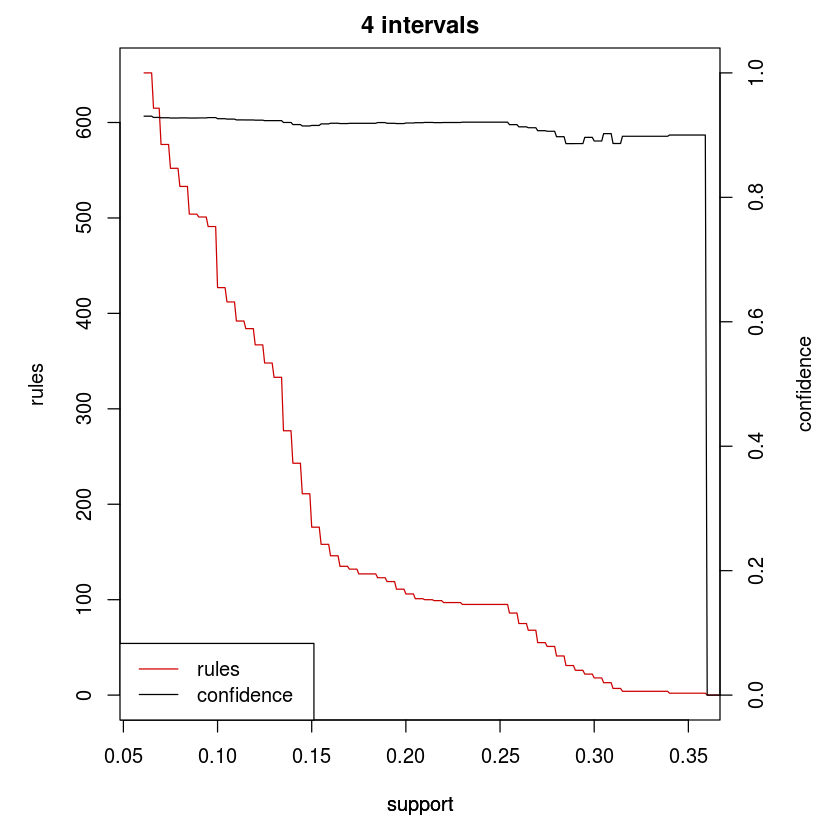

In [45]:
d = data.frame(sup_4,
           rules_4,
           confidence_4, 2)
par(mar = c(5,5,2,5))
with(d
     , plot(sup_4, rules_4, type="l", main="4 intervals",col="red3", xlab="support",
             ylab="rules",xlim=c(min_x_4,0.355)))
par(new = T)
with(d, plot(sup_4, confidence_4, axes=F, xlab="support", ylab=NA, type="l",xlim=c(min_x_4,0.355),ylim=c(0,1)))
axis(side = 4)
mtext(side = 4, line = 3, 'confidence')
legend("bottomleft",
       legend=c("rules", "confidence"),
       lty=c(1,1), col=c("red3", "black"))


In [ ]:
crabs_int_5 = discretize_all(crabs, "interval",5)
min_sup = 6/200
min_x_5 = min_sup
i=0 
sup_5 <- vector()
rules_5 <- vector()
confidence_5 <- vector()
while (min_sup <= 1){
    sup_5[i] <- min_sup
    i=i+1
    min_sup = min_sup + 0.001
}
i=1
for (value in sup_5){
    is <- apriori(crabs_int_5, parameter = list(support = value, target="rules"))
    rules_5[i]<-length(is)
    is_o <- as(is,"data.frame")
    
    #ruledf = data.frame(lhs = labels(lhs(is_o))$elements,rhs = labels(rhs(is_o))$elements, is_o@quality)
    total_con=0
    if (is.na(mean(is_o[["confidence"]]))){
        confidence_5[i] <- 0
    } else {
        confidence_5[i] <- mean(is_o[["confidence"]])
        
    }
    i=i+1
}

In [ ]:
d = data.frame(sup_5,
           rules_5,
           confidence_5, 2)
par(mar = c(5,5,2,5))
with(d
     , plot(sup_5, rules_5, type="l", col="red3", 
             ylab="rules_5",xlim=c(min_x_5,0.57)))
par(new = T)
with(d, plot(sup_5, confidence_5, axes=F, xlab=NA, ylab=NA, type="l",xlim=c(min_x_5,0.3),ylim=c(0,1)))
axis(side = 4)
mtext(side = 4, line = 3, 'Number genes selected')
legend("bottomleft",
       legend=c("rules_5", "confidence"),
       lty=c(1,1), col=c("red3", "black"))

### b.

## 2. - vote.csv
### a.

In [4]:
library(readr)
noshows <-read_csv("data/noshows.csv")

ERROR: Error: 'data/noshows.csv' does not exist in current working directory ('/home/martinho/Documents/IST/SAD/project/part1').


In [9]:
library(dplyr)
noshows = mutate_if(noshows, is.character, as.factor)
class(noshows)

[1] "tbl_df"     "tbl"        "data.frame"

In [3]:
noshows$PatientId <- NULL
noshows$AppointmentID <- NULL
noshows$ScheduledDay <- NULL
noshows["No-show"] <- NULL
noshows$AppointmentDay <- as.factor(noshows$AppointmentDay)
class(noshows)
wd_noshows = noshows

ERROR: Error in noshows$PatientId <- NULL: object 'noshows' not found


In [48]:
head(wd_noshows,n=3)
dim(noshows)

Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NAF,NAM,⋯,NASANTOS REIS,NASAO BENEDITO,NASAO CRISTOVAO,NASAO JOSE,NASAO PEDRO,NASEGURANCA DO LAR,NASOLON BORGES,NATABUAZEIRO,NAUNIVERSITARIO,NAVILA RUBIM
F,62,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
M,56,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
F,62,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 110527     10

In [40]:
Neigh_dummies = dummy(noshows$Neighbourhood)
Apoi_dummies = dummy(noshows$AppointmentDay)
Gen_dummies = dummy(noshows$Gender)



In [1]:
wd_noshows$Neighbourhood <- NULL
wd_noshows$AppointmentDay <- NULL
wd_noshows$Gender <- NULL
wd_noshows = cbind(wd_noshows, Gen_dummies)
wd_noshows = cbind(wd_noshows, Apoi_dummies)
wd_noshows = cbind(wd_noshows, Neigh_dummies)

ERROR: Error in wd_noshows$Neighbourhood <- NULL: object 'wd_noshows' not found


In [2]:
head(wd_noshows,n=2)
colnames(wd_noshows)
dim(wd_noshows)

ERROR: Error in head(wd_noshows, n = 2): object 'wd_noshows' not found


#### Este comando dá erro e é previsto dar erro, pelo menos é o que a stora diz no doc de apoio. Mas não percebo bem porque é que isso acontece

In [49]:
str(wd_noshows)

'data.frame':	110527 obs. of  118 variables:
 $ Gender                       : chr  "F" "M" "F" "F" ...
 $ Age                          : int  62 56 62 8 56 76 23 39 21 19 ...
 $ Scholarship                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hipertension                 : int  1 0 0 0 1 1 0 0 0 0 ...
 $ Diabetes                     : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NAF                          : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NAM                          : int  0 1 0 0 0 0 0 0 0 0 ...
 $ NA2016-04-29                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NA2016-05-02                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NA2016-05-03                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NA2016-05-04                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NA2016-05-05                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NA

In [42]:
noshows_int_4 = discretize_all(noshows, "interval",4)
class(noshows_int_4)

 Gender    AppointmentDay                       Age       
 F:71840   Min.   :2016-04-29 00:00:00   [ -1, 28):41260  
 M:38687   1st Qu.:2016-05-09 00:00:00   [ 28, 57):43398  
           Median :2016-05-18 00:00:00   [ 57, 86):24709  
           Mean   :2016-05-19 00:57:50   [ 86,115]: 1160  
           3rd Qu.:2016-05-31 00:00:00                    
           Max.   :2016-06-08 00:00:00                    
                                                          
         Neighbourhood        Scholarship         Hipertension  
 JARDIM CAMBURI : 7717   [0.00,0.25):99666   [0.00,0.25):88726  
 MARIA ORTIZ    : 5805   [0.75,1.00]:10861   [0.75,1.00]:21801  
 RESISTENCIA    : 4431                                          
 JARDIM DA PENHA: 3877                                          
 ITARARE        : 3514                                          
 CENTRO         : 3334                                          
 (Other)        :81849                                          
        

[1] "tbl_df"     "tbl"        "data.frame"

In [40]:
noshows_int_4 = discretize_all(noshows, "interval",4)
min_sup = 1160/110527
min_x_4 = min_sup
i=0 
sup_4 <- vector()
rules_4 <- vector()
confidence_4 <- vector()
while (min_sup <= 1){
    sup_4[i] <- min_sup
    i=i+1
    min_sup = min_sup + 0.01
}
i=1
for (value in sup_4){
    is <- apriori(noshows_int_4, parameter = list(support = value, target="rules"))
    is_o <- as(is,"data.frame")
    rules_4[i]<-length(is)
    #ruledf = data.frame(lhs = labels(lhs(is_o))$elements,rhs = labels(rhs(is_o))$elements, is_o@quality)
    total_con=0
    if (is.na(mean(is_o[["confidence"]]))){
        confidence_4[i] <- 0
    } else {
        confidence_4[i] <- mean(is_o[["confidence"]])
        
    }
    i=i+1
}

 Gender    AppointmentDay                       Age       
 F:71840   Min.   :2016-04-29 00:00:00   [ -1, 28):41260  
 M:38687   1st Qu.:2016-05-09 00:00:00   [ 28, 57):43398  
           Median :2016-05-18 00:00:00   [ 57, 86):24709  
           Mean   :2016-05-19 00:57:50   [ 86,115]: 1160  
           3rd Qu.:2016-05-31 00:00:00                    
           Max.   :2016-06-08 00:00:00                    
                                                          
         Neighbourhood        Scholarship         Hipertension  
 JARDIM CAMBURI : 7717   [0.00,0.25):99666   [0.00,0.25):88726  
 MARIA ORTIZ    : 5805   [0.75,1.00]:10861   [0.75,1.00]:21801  
 RESISTENCIA    : 4431                                          
 JARDIM DA PENHA: 3877                                          
 ITARARE        : 3514                                          
 CENTRO         : 3334                                          
 (Other)        :81849                                          
        

ERROR: Error in asMethod(object): column(s) 2 not logical or a factor. Discretize the columns first.


### b.